In [7]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [11]:
print(timeseries.head())

   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0


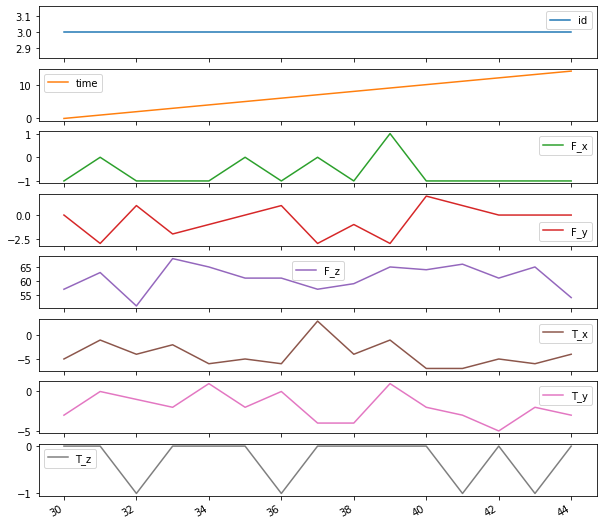

In [10]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

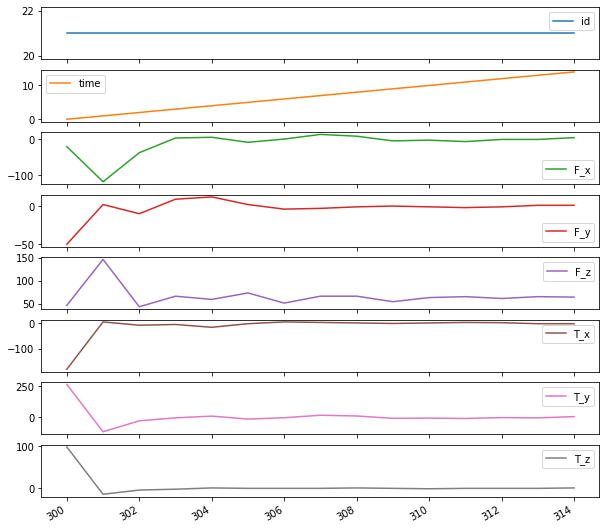

In [9]:
timeseries[timeseries['id'] == 21].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [12]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 20/20 [00:20<00:00,  1.71it/s]


In [13]:
extracted_features

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""__maxlag_40","F_x__agg_autocorrelation__f_agg_""median""__maxlag_40","F_x__agg_autocorrelation__f_agg_""var""__maxlag_40","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,T_z__symmetry_looking__r_0.9,T_z__symmetry_looking__r_0.9500000000000001,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-1,T_z__value_count__value_0,T_z__value_count__value_1,T_z__variance,T_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-1.0,-1.0,0.0,NaN,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,15.0,0.0,0.000000,0.0
2,25.0,14.0,-0.039098,-4.935275e-02,0.088790,0.0,0.0,0.0,0.0,NaN,...,1.0,1.0,0.000000,0.000000,0.000000,4.0,11.0,0.0,0.195556,0.0
3,12.0,10.0,-0.029815,3.035766e-17,0.105435,1.0,-1.0,-2.0,0.0,NaN,...,1.0,1.0,0.000000,-0.090909,0.000000,4.0,11.0,0.0,0.195556,0.0
4,16.0,17.0,-0.049773,-6.417112e-02,0.143580,1.0,-1.0,-1.0,0.0,NaN,...,1.0,1.0,0.000000,-0.181818,0.000000,6.0,8.0,1.0,0.355556,0.0
5,17.0,13.0,-0.061467,-5.172414e-02,0.052642,2.0,-1.0,-2.0,0.0,NaN,...,1.0,1.0,-0.076923,-0.090909,-0.222222,4.0,9.0,2.0,0.382222,0.0
6,39.0,24.0,-0.057760,0.000000e+00,0.132493,1.0,0.0,0.0,0.0,NaN,...,1.0,1.0,-0.153846,0.000000,0.111111,4.0,10.0,1.0,0.293333,0.0
7,21.0,13.0,-0.213085,-8.561644e-02,0.775130,0.0,0.0,0.0,0.0,NaN,...,1.0,1.0,0.153846,0.000000,0.222222,2.0,12.0,1.0,0.195556,0.0
8,26.0,16.0,-0.002893,-1.580460e-01,0.299821,2.0,-1.0,-1.0,0.0,NaN,...,1.0,1.0,-0.461538,-1.090909,-1.444444,5.0,7.0,2.0,1.066667,1.0
9,24.0,20.0,-0.037626,7.211538e-02,0.098712,2.0,-1.0,-2.0,0.0,NaN,...,1.0,1.0,-0.153846,-0.181818,0.888889,4.0,6.0,4.0,1.093333,1.0


In [14]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [15]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 20/20 [00:17<00:00,  1.43it/s]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [16]:
features_filtered_direct

variable,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_1__attr_""abs""",T_y__abs_energy,F_z__standard_deviation,...,T_y__number_cwt_peaks__n_1,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_5","F_y__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_2",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,14.0,15.0,13.0,0.471405,0.222222,1.000000,1.165352,10.0,1.203698,...,4.0,0.000000,0.000000,-3.0,1.0,-0.751682,-0.310265,-1.0,-5.960000e+02,-1.0
2,7.0,25.0,13.0,76.0,2.054805,4.222222,0.624118,6.020261,90.0,4.333846,...,4.0,0.000000,1.000000,-9.2,1.0,0.057818,-0.202951,-3.6,-6.803846e+02,-1.0
3,11.0,12.0,14.0,40.0,1.768867,3.128889,2.203858,8.235442,103.0,4.616877,...,3.0,0.000000,3.000000,-6.6,0.0,0.912474,0.539121,-4.0,-6.170000e+02,-1.0
4,5.0,16.0,10.0,60.0,2.669998,7.128889,0.844394,12.067855,124.0,3.833188,...,5.0,0.000000,0.000000,-9.0,0.0,-0.609735,-2.641390,-4.6,3.426308e+03,-1.0
5,9.0,17.0,13.0,46.0,2.039608,4.160000,2.730599,6.445330,180.0,4.841487,...,5.0,0.000000,0.000000,-9.6,0.0,0.072771,0.591927,-5.0,-2.609000e+03,-1.0
6,6.0,39.0,7.0,88.0,2.080598,4.328889,2.001820,2.827440,225.0,3.047768,...,3.0,0.000000,0.000000,-12.0,1.0,0.475583,-0.600927,-5.6,3.061538e+01,-2.0
7,8.0,21.0,13.0,27.0,1.892676,3.582222,1.133819,12.822865,234.0,5.243409,...,4.0,0.000000,3.000000,-10.0,0.0,-1.862009,-1.582648,-5.0,1.066923e+03,-1.0
8,8.0,26.0,9.0,24.0,2.445858,5.982222,2.090520,11.285890,213.0,4.364503,...,3.0,0.000000,0.000000,-12.0,0.0,-1.321280,-2.080054,-5.6,-8.673692e+03,-1.2
9,7.0,24.0,12.0,60.0,1.557776,2.426667,0.866097,4.619776,253.0,4.027682,...,3.0,2.250000,6.333333,-14.2,0.0,-1.141088,-0.926589,-5.6,-4.288538e+03,-1.0


[[ 2.94805195e+00  5.96949351e+03  4.53246753e+00 ... -2.24935065e+01
  -3.31439879e+06 -3.60000000e+00]
 [ 2.00000000e-01  1.97112700e+05  2.00000000e-01 ... -1.59220000e+02
  -7.29879854e+07 -2.53000000e+01]
 [ 0.00000000e+00  9.22696000e+05  0.00000000e+00 ... -9.80000000e+01
   7.94951369e+07 -2.50000000e+02]]


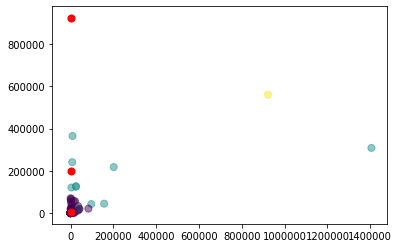

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(features_filtered_direct)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(features_filtered_direct["F_x__abs_energy"],features_filtered_direct["F_y__abs_energy"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [41]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
import typing


def plot_dendogram(clust):
    plt.figure(figsize=(25, 10))
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("sample index")
    plt.ylabel("distance")
    hac.dendrogram(
        clust,
        leaf_rotation=90.0,  # rotates the x axis labels
        leaf_font_size=8,  # font size for the x axis labels
    )
    plt.show()


def spearman_metric(x, y):
    r = stats.pearsonr(x, y)[0]
    return 1 - r  # correlation to distance: range 0 to 2


def clusterize(tss: pd.DataFrame, metric: typing.Callable = "correlation"):
    return hac.linkage(tss, method="single", metric=metric)


def print_clusters(tss, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion="maxclust")

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for clust in clusters:
        cluster_indeces = s[s == clust].index
        print(
            f"Cluster {clust} number of entries {len(cluster_indeces)} : {list(cluster_indeces)}"
        )
        if plot:
            tss.T.iloc[:, cluster_indeces].plot()
            plt.show()


def build_test_dataframe(n) -> pd.DataFrame():
    x = np.linspace(0, 5, n)
    scale = 4

    a = scale * np.sin(x)
    b = scale * (np.cos(1 + x * 3) + np.linspace(0, 1, n))
    c = scale * (np.sin(2 + x * 6) + np.linspace(0, -1, n))
    d = scale * (np.cos(3 + x * 9) + np.linspace(0, 4, n))
    e = scale * (np.sin(4 + x * 12) + np.linspace(0, -4, n))
    f = scale * np.cos(x)

    #
    # from each main series build 'group_size' series
    #

    return pd.DataFrame([a, b, c, d, e, f])



TypeError: Linkage matrix 'Z' must contain doubles.

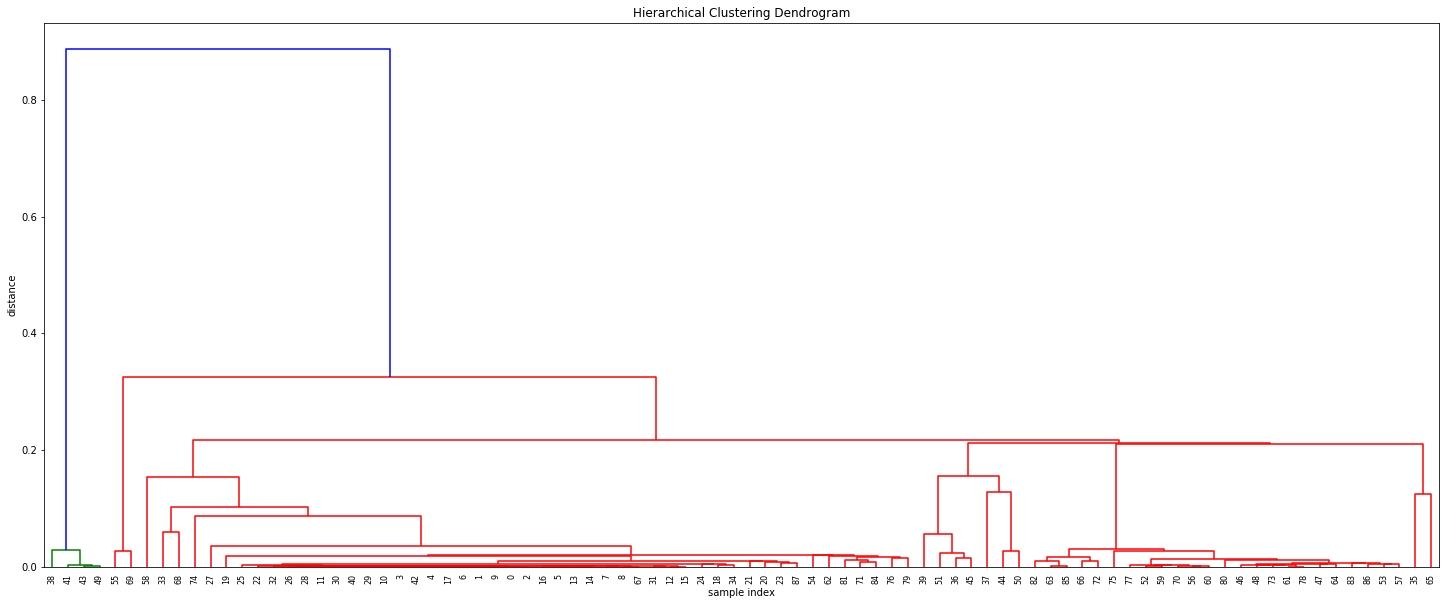

Cluster 3 number of entries 49 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 40, 42, 54, 58, 62, 67, 68, 71, 74, 76, 79, 81, 84, 87]


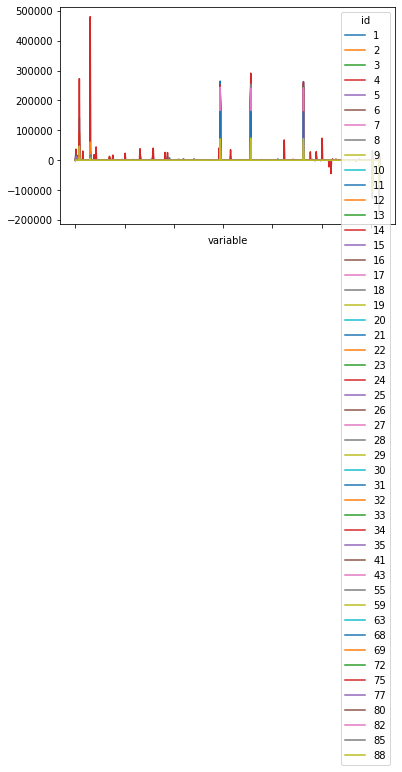

Cluster 7 number of entries 2 : [35, 65]


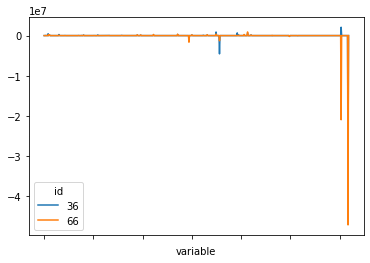

Cluster 4 number of entries 4 : [36, 39, 45, 51]


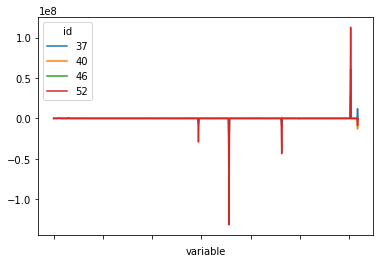

Cluster 5 number of entries 3 : [37, 44, 50]


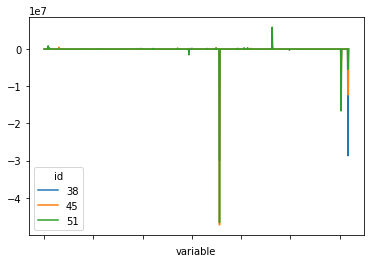

Cluster 1 number of entries 4 : [38, 41, 43, 49]


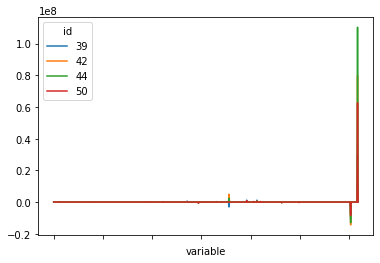

Cluster 6 number of entries 24 : [46, 47, 48, 52, 53, 56, 57, 59, 60, 61, 63, 64, 66, 70, 72, 73, 75, 77, 78, 80, 82, 83, 85, 86]


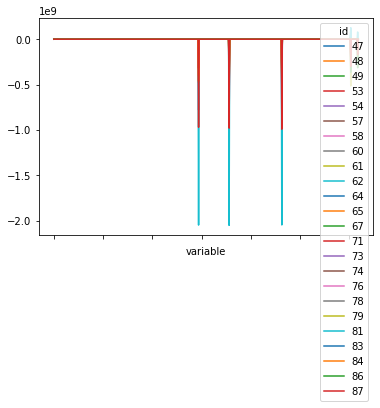

Cluster 2 number of entries 2 : [55, 69]


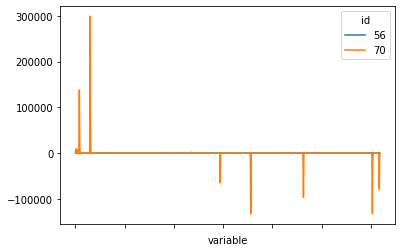

In [48]:
cluster = clusterize(features_filtered_direct)
plot_dendogram(cluster)
print_clusters(features_filtered_direct, cluster, 7, plot=True)